#### By Akash Tomer [263akash@gmail.com]

In [163]:
####  Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
from google.colab import drive
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [3]:
!ls

gdrive	sample_data


In [4]:
# Reading raw data
# df = pd.read_csv(r'C:\Users\tomer\Downloads\ACT\ACT India D&A GCC_Data Scientist_Case\Bank Customer Historic Data.csv')
df = pd.read_csv(r'/content/gdrive/MyDrive/ACT Solution/Bank Customer Historic Data.csv')

df.shape

(10000, 14)

In [5]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# checking dateset data type
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [8]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
# Drop the features not required for building model[customer specific features]
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA

In [11]:
df.Exited.value_counts(dropna=False,normalize= True) 

0    0.7963
1    0.2037
Name: Exited, dtype: float64

##### More then 20% people churned

In [12]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [13]:
df.IsActiveMember.value_counts(dropna=False,normalize= True) 

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

In [14]:
print (df[df.IsActiveMember == 1]['HasCrCard'].value_counts(normalize= True))
print (df[df.IsActiveMember == 0]['HasCrCard'].value_counts(normalize= True))

1    0.700252
0    0.299748
Name: HasCrCard, dtype: float64
1    0.711074
0    0.288926
Name: HasCrCard, dtype: float64


In [15]:
df.IsActiveMember.unique()

array([1, 0])

In [16]:
df.HasCrCard.unique()

array([1, 0])

In [17]:
df.Age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

### Oldest customer is 83 and youngest is 18 year old

#### Almost 50% people are not active, and among both Active and Inactive customer's almost 70% have Credit Card

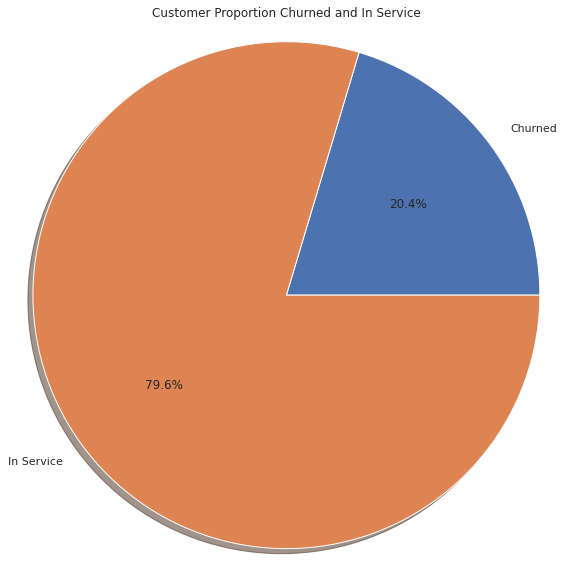

In [157]:
labels = 'Churned', 'In Service'
data = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(data, labels=labels, shadow=True,autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Customer Proportion Churned and In Service")
plt.show()

#### Here we have total 10k unique customers where 2037 churned. Which is more then 20% of overall Customers

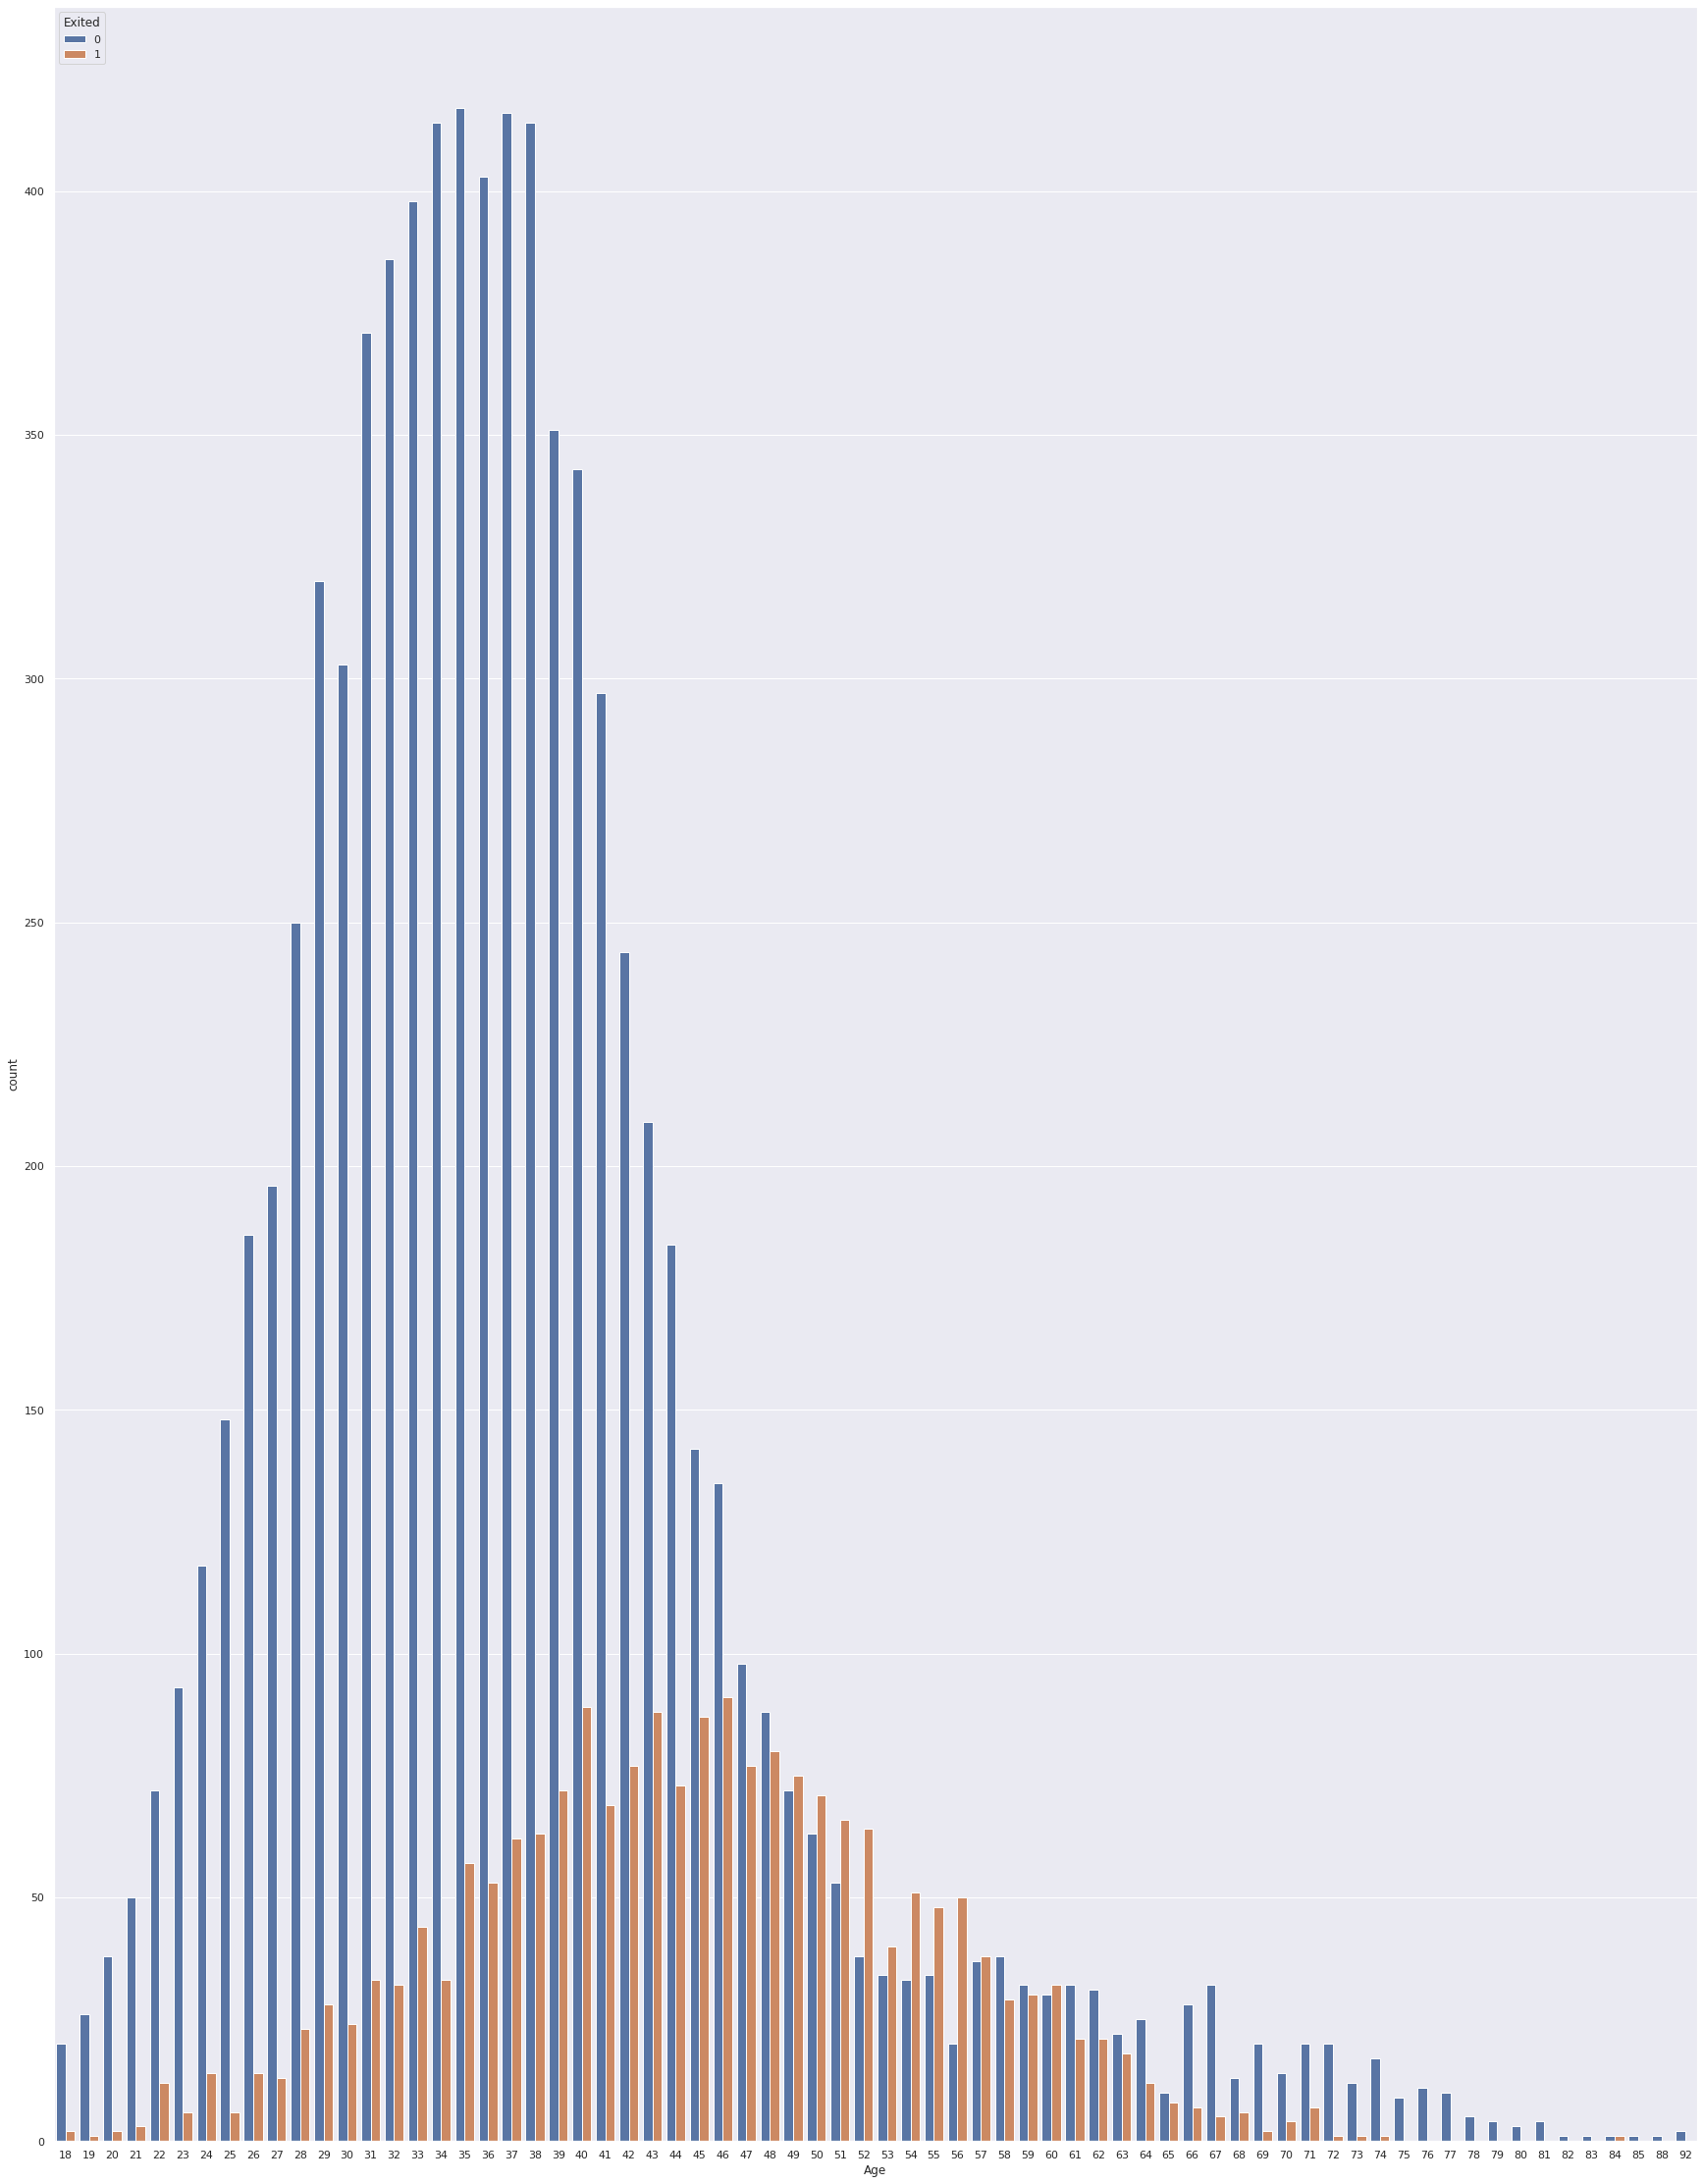

In [19]:
sns.set(rc={'figure.figsize':(30,40)})

# import matplotlib.pyplot as plt
sns.countplot(x='Age', hue = 'Exited',data = df)

#### Here it is clear, almost all age group are churning. Mostly we have young customer's in operation but But people between age 40 and 60(older customer) are churning more.

### Data visualization

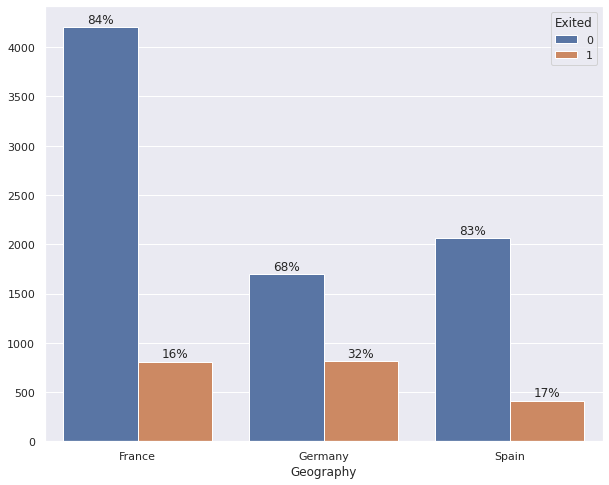

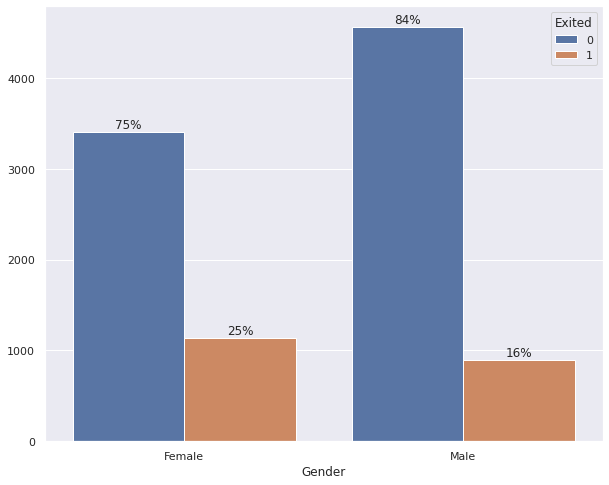

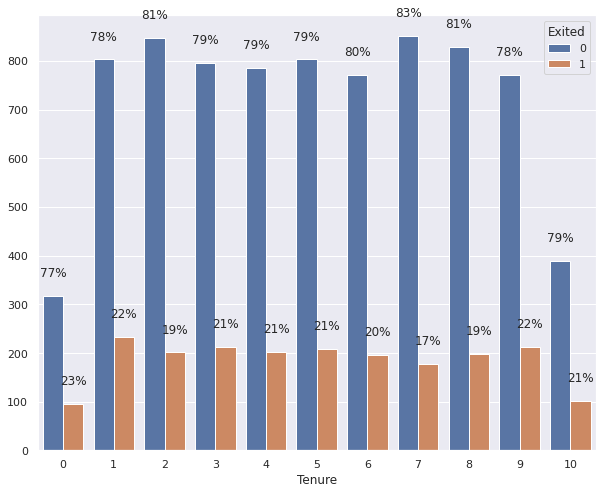

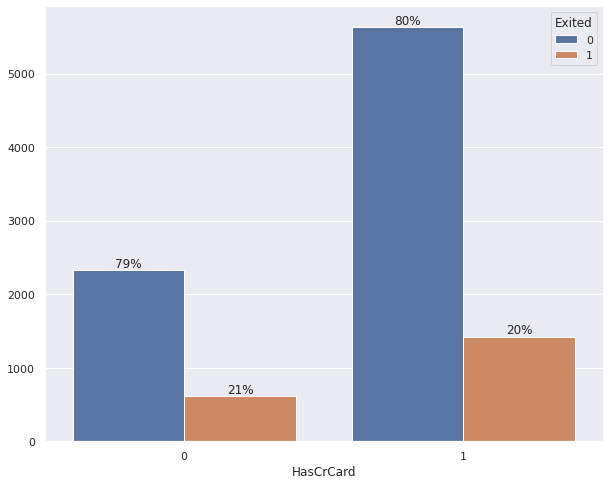

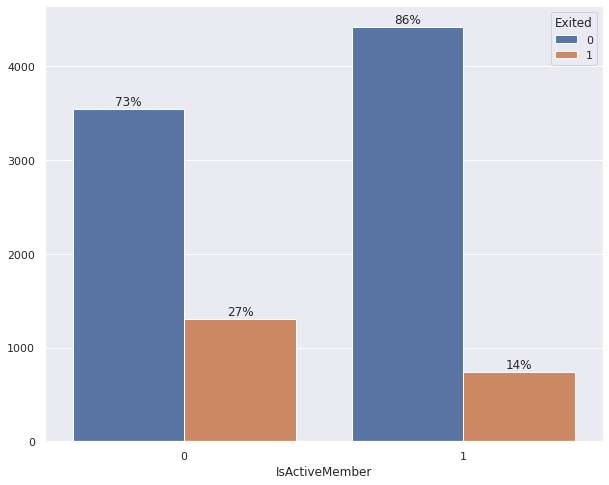

In [20]:

Feature = ['Geography','Gender','Tenure','HasCrCard','IsActiveMember']

for index, category in enumerate(Feature):
    plt.subplots(figsize=(10, 8))

    order = sorted(df[category].unique())
    ax = sns.countplot(category, data=df, hue="Exited", order=order)
    ax.set_ylabel('')

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

### From Above Visualization:
#### It is clear from above observation that, People in Germany(32%) churned more followed by Spain and France.
#### Also Female are churning more then Male customers.
#### And also Churning rate is similar for all Tenure type.
#### Also Peole with credit card or not are churning and have almost same churning rate. But comparatively people without credit  card people are churning more 
#### And Most Churned customers are not Active Member

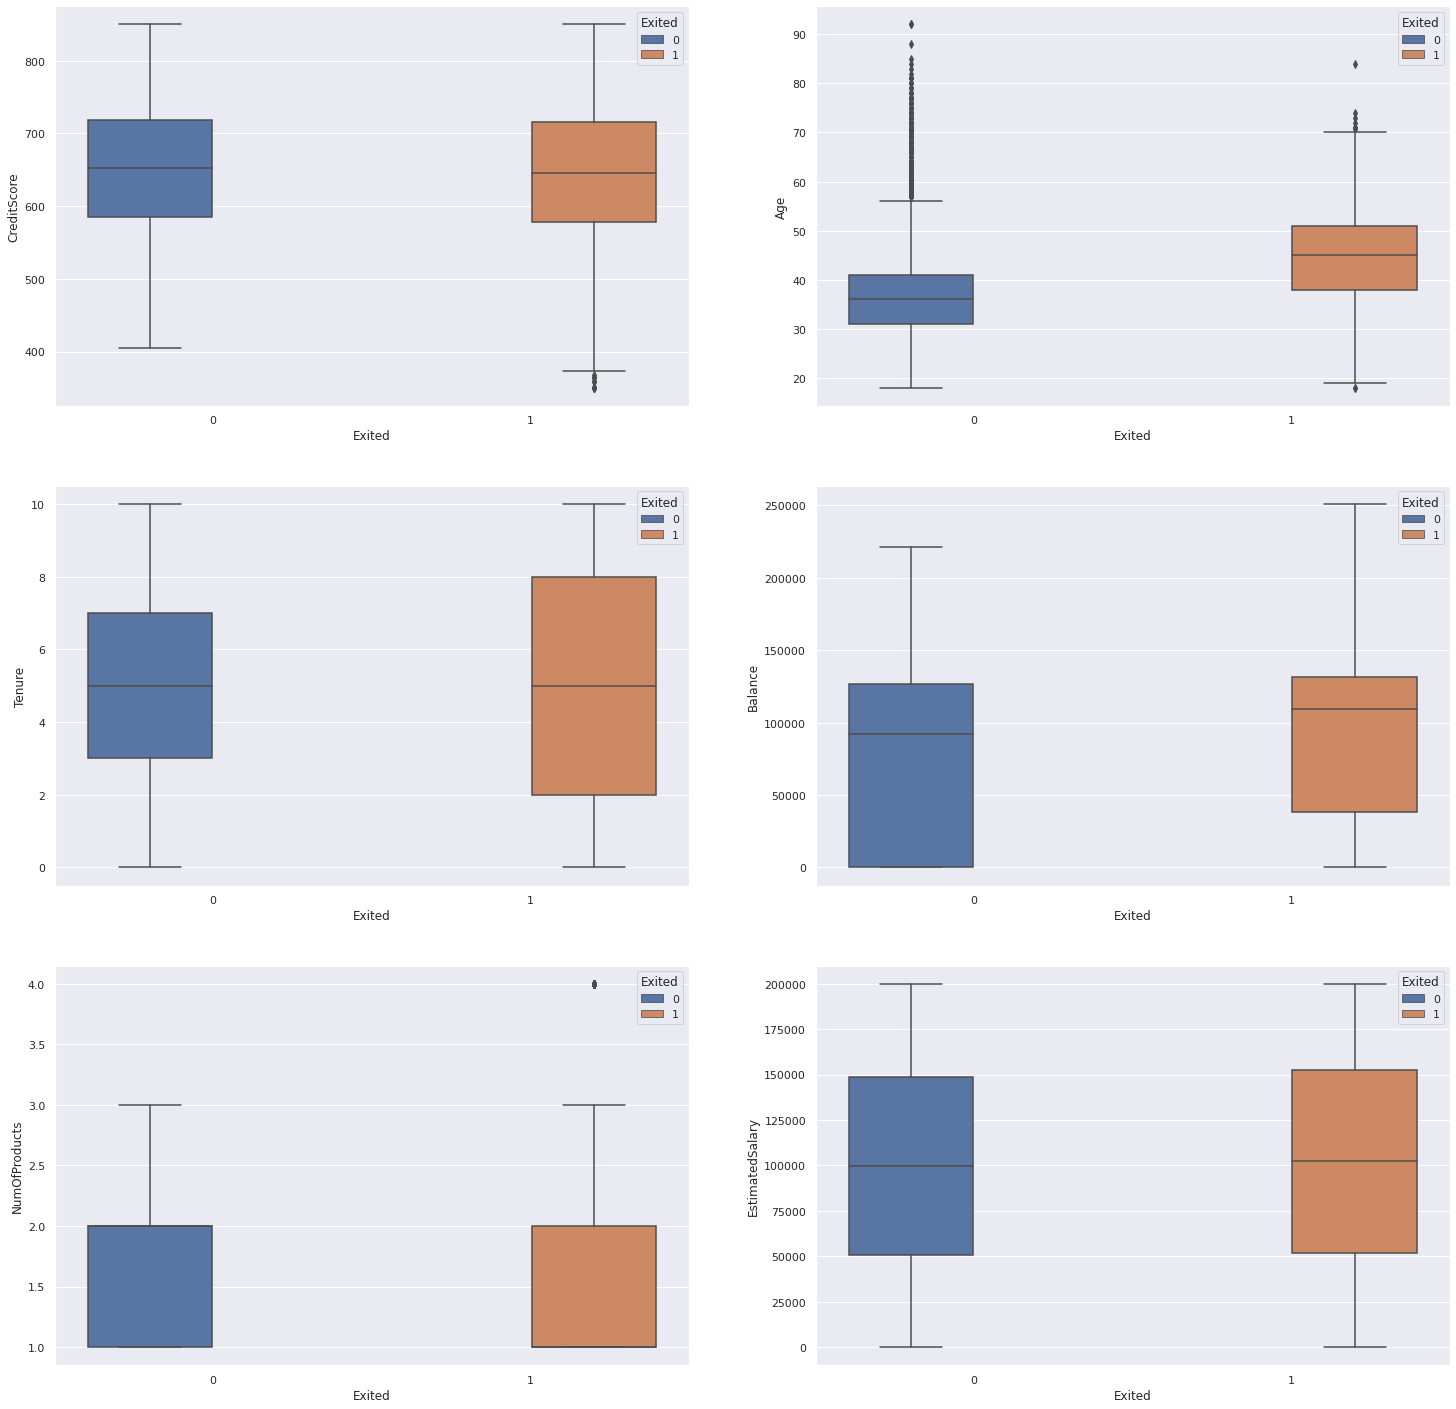

In [21]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(25, 25))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

#### Not any visible difference in credit score distribution between In Service and Churned customers. irrrespective of any Credir score people are churning
#### Here it is clear, almost all age group are churning. Mostly we have young customer's in operation but But people between age 40 and 60(older customer) are churning more. Thus Special programs or promotions needed for older customers.
#### Customers with extreme high or low tenure are more likely to churn compared to those that are of average tenure.
#### Mojority Customers with significant bank balances are churning which needs to be reviewed by bank and is an area of concern.
#### Product do not have much impact on customer churning.
#### Salary do not have much impact on customer churning.

In [22]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### Feature engineering

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
## we checked above available features data types: ['int64','object','float64']
int_col= df.select_dtypes(include=['int64']).columns.tolist()
flt_col= df.select_dtypes(include=['float64']).columns.tolist()
obj_col= df.select_dtypes(include=['object']).columns.tolist()

In [26]:
int_col,flt_col, obj_col

(['CreditScore',
  'Age',
  'Tenure',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'Exited'],
 ['Balance', 'EstimatedSalary'],
 ['Geography', 'Gender'])

In [28]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [29]:
#### One Hot encoding for Categorical Features

In [30]:
df1= pd.get_dummies(df, columns=['Gender','Geography'])

In [32]:
df1.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1


In [33]:
# creating 'BalanceSalaryPercentage' feature in order to get the ration beween Customer balance and Salary
df1['BalanceSalaryPercentage'] = df1.Balance/df1.EstimatedSalary

# creating 'BalanceSalaryPercentage' feature in order to get the ration beween Customer balance and Salary
df1['TenureAgePercentage'] = df1.Tenure/df1.Age

# Finally created a feature to capture credit score age Percentage to analyze credit behaviour.
df1['CreditScorenAgePercentage'] = df1.CreditScore/(df1.Age)

In [34]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryPercentage,TenureAgePercentage,CreditScorenAgePercentage
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,0.000000,0.047619,14.738095
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,0.744677,0.024390,14.829268
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,1.401375,0.190476,11.952381
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,0.000000,0.025641,17.923077
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,1.587055,0.046512,19.767442


#### Here it is clear that few feature needs to be scaled

In [35]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df1))

Top Absolute Correlations
Gender_Female     Gender_Male                  1.000000
Tenure            TenureAgePercentage          0.888362
Age               CreditScorenAgePercentage    0.801209
Geography_France  Geography_Germany            0.580359
                  Geography_Spain              0.575418
dtype: float64


#### Scaling dataset features

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(df1)

df_final= pd.DataFrame(x,columns=df1.columns)
# df1.apply(lambda x: MinMaxScaler().fit_transform(x))
df_final.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,BalanceSalaryPercentage,TenureAgePercentage,CreditScorenAgePercentage
0,0.538,0.324324,0.2,0.000000,0.0,1.0,1.0,0.506735,1.0,1.0,0.0,1.0,0.0,0.0,0.00000,0.085714,0.235083
1,0.516,0.310811,0.1,0.334031,0.0,0.0,1.0,0.562709,0.0,1.0,0.0,0.0,0.0,1.0,0.00007,0.043902,0.237252


#### Split data into test and train

In [66]:
X= df_final.iloc[:,df_final.columns != 'Exited'] #Independent variable
Y= df_final.loc[:,df_final.columns == 'Exited'] #dependent variable

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### Running multiple algorithms and finding their best hyperparems of best performing algo.

In [130]:
from sklearn.neighbors import KNeighborsClassifier
# # Fiting knn
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print (accuracy_score(y_test,knn.predict(x_test)), f1_score(y_test,knn.predict(x_test)))

0.8185 0.3163841807909605


In [128]:
# Fit logistic regression with degree 2 polynomial kernel
lgr= LogisticRegression(solver = 'liblinear')
lgr.fit(x_train,y_train)
print (accuracy_score(y_test,lgr.predict(x_test)), f1_score(y_test,lgr.predict(x_test)))

0.819 0.35587188612099646


In [127]:
#Support Vector machine
# for linear kernel
svm_l= SVC(kernel = 'linear').fit(x_train,y_train)
svm_l.fit(x_train,y_train)
print (accuracy_score(y_test,svm_l.predict(x_test)), f1_score(y_test,svm_l.predict(x_test)))

# for rbf kernel
svm_r= SVC(kernel =  'rbf').fit(x_train,y_train)
svm_r.fit(x_train,y_train)
print (accuracy_score(y_test,svm_r.predict(x_test)), f1_score(y_test,svm_r.predict(x_test)))

# for poly kernel
svm_p= SVC(kernel = 'poly').fit(x_train,y_train)
svm_p.fit(x_train,y_train)
print (accuracy_score(y_test,svm_p.predict(x_test)), f1_score(y_test,svm_p.predict(x_test)))

0.797 0.0
0.833 0.36259541984732824
0.856 0.5183946488294313


In [126]:
# # Decisiontree classifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print (accuracy_score(y_test,dtc.predict(x_test)), f1_score(y_test, dtc.predict(x_test)))

0.797 0.5223529411764706


In [125]:
# # RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
print (accuracy_score(y_test, rfc.predict(x_test)), f1_score(y_test,rfc.predict(x_test)))

0.869 0.605421686746988


In [124]:
# # XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
print (accuracy_score(y_test,xgb.predict(x_test)), f1_score(y_test,xgb.predict(x_test)))

0.872 0.6144578313253012


#### Here RFC and extreme Gradient boosting outperformes other algorithms, lets find their best hyperparams usin gridsearch cv

In [122]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9,12,16],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RFC_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RFC_grid.fit(x_train,y_train)
print (accuracy_score(y_test,RFC_grid.predict(x_test)), f1_score(y_test,RFC_grid.predict(x_test)))

0.871 0.6172106824925816


In [123]:
# # Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(x_train,y_train)
print (accuracy_score(y_test,xgb_grid.predict(x_test)), f1_score(y_test,xgb_grid.predict(x_test)))

0.889 0.6715976331360947


##### Best Params after grid search

In [136]:
print (xgb_grid.best_params_, xgb_grid.best_estimator_)
print ('\n')
print (RFC_grid.best_params_, RFC_grid.best_estimator_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100} XGBClassifier(gamma=0.01, max_depth=5, min_child_weight=5)


{'max_depth': 7, 'max_features': 9, 'min_samples_split': 7, 'n_estimators': 50} RandomForestClassifier(max_depth=7, max_features=9, min_samples_split=7,
                       n_estimators=50)


In [138]:
# # RandomForestClassifier
rfc= RandomForestClassifier(max_depth=7, max_features=9, min_samples_split=7,n_estimators=50)
rfc.fit(x_train,y_train)
print (accuracy_score(y_test, rfc.predict(x_test)), f1_score(y_test, rfc.predict(x_test)))

0.868 0.6024096385542169


In [137]:
# # XGBClassifier
xgb= XGBClassifier(gamma=0.01, max_depth=5, min_child_weight=5,learning_rate= 0.1,n_estimators=100)
xgb.fit(x_train,y_train)
print (accuracy_score(y_test, xgb.predict(x_test)), f1_score(y_test, xgb.predict(x_test)))

0.872 0.630057803468208


In [143]:
print (classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1594
         1.0       0.78      0.49      0.60       406

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [142]:
print (classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      1594
         1.0       0.76      0.54      0.63       406

    accuracy                           0.87      2000
   macro avg       0.83      0.75      0.78      2000
weighted avg       0.86      0.87      0.86      2000



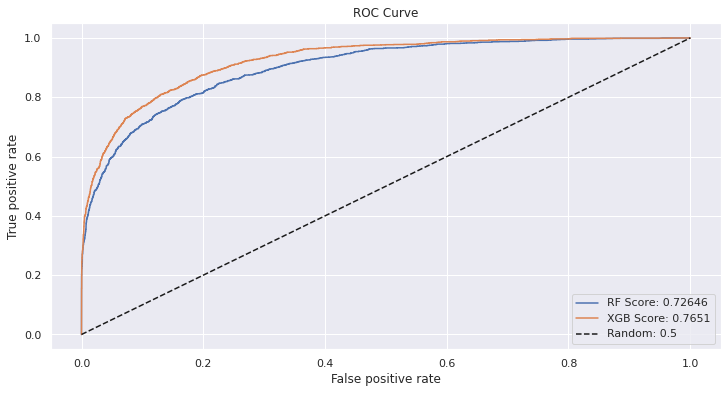

In [150]:
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y_train, rfc.predict(x_train),rfc.predict_proba(x_train)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y_train, xgb.predict(x_train),xgb.predict_proba(x_train)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF, tpr_RF, label = 'RF Score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB Score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

So from above models it is clear that a the best model is the one that gives a balance between precision and recall is gradient boost and random forest model. But in extreme gradient on the test data with a precision score on 1's is 0.76, out of all customers that the model thinks will churn and 76% clearly churned and with the recall score of 0.54 on the 1's. Means the model is able to highlight 54% of those who churned.
Model performance likely to improve in future when we have more datapoint in time.